In [ ]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [7]:
pip install requests beautifulsoup4


In [38]:
url = 'https://results.eci.gov.in/PcResultGenJune2024/index.htm#'

response = requests.get(url)

if response.status_code == 200:

    soup = BeautifulSoup(response.content, 'html.parser')
    tables = soup.find_all('table')


    if tables:
        with open('Election.csv', 'w', newline='', encoding='utf-8') as csvfile:
            writer = csv.writer(csvfile)

            for table in tables:

                rows = table.find_all('tr')


                for row in rows:

                    cells = row.find_all(['td', 'th'])


                    row_data = [cell.get_text().strip() for cell in cells]
                    writer.writerow(row_data)

        print("Table data has been successfully written to 'Election.csv'.")
    else:
        print("No tables found on the webpage.")
else:
    print(f"Failed to retrieve the webpage. Status code: {response.status_code}")

Table data has been successfully written to 'Election.csv'.


In [ ]:
pip install matplotlib


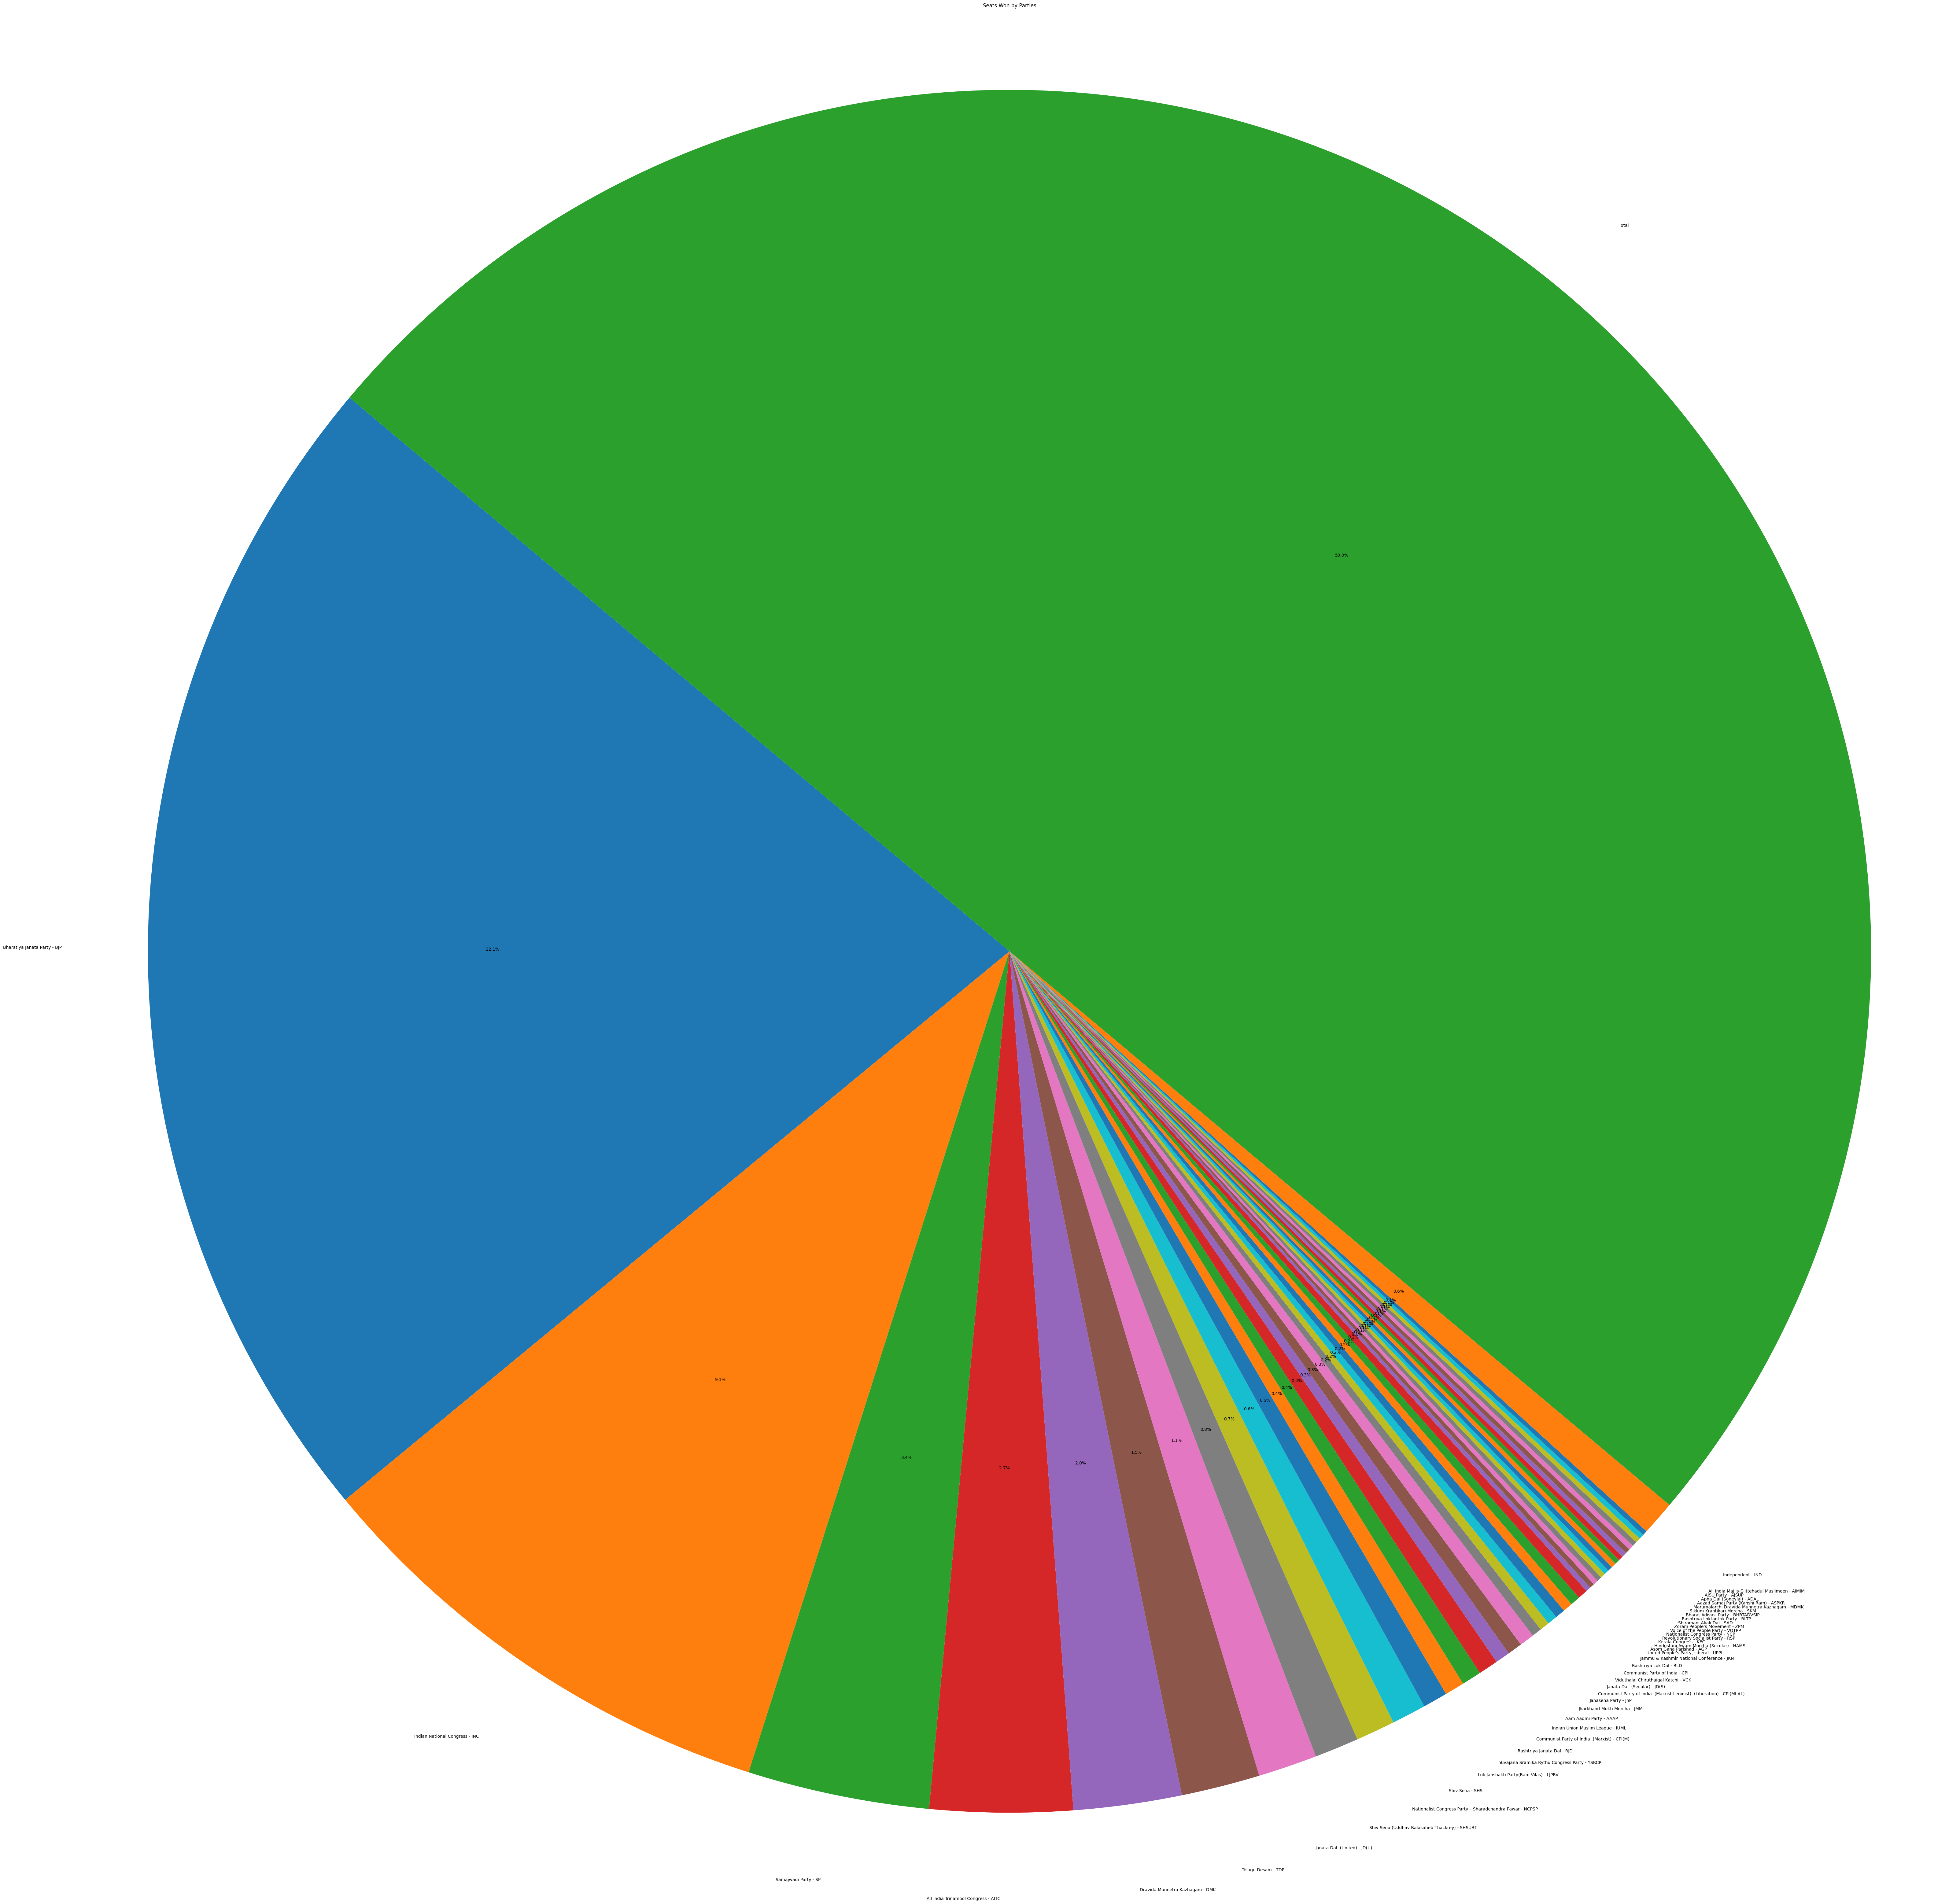

In [36]:
import csv
import matplotlib.pyplot as plt

csv_file = '/content/Election.csv'

parties = []
seats_won = []
with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        parties.append(row['Party'])
        seats_won.append(int(row['Won']))
plt.figure(figsize=(80,80))
plt.pie(seats_won, labels=parties, autopct='%1.1f%%', startangle=140)
plt.title('Seats Won by Parties')
plt.axis('equal')
plt.show()


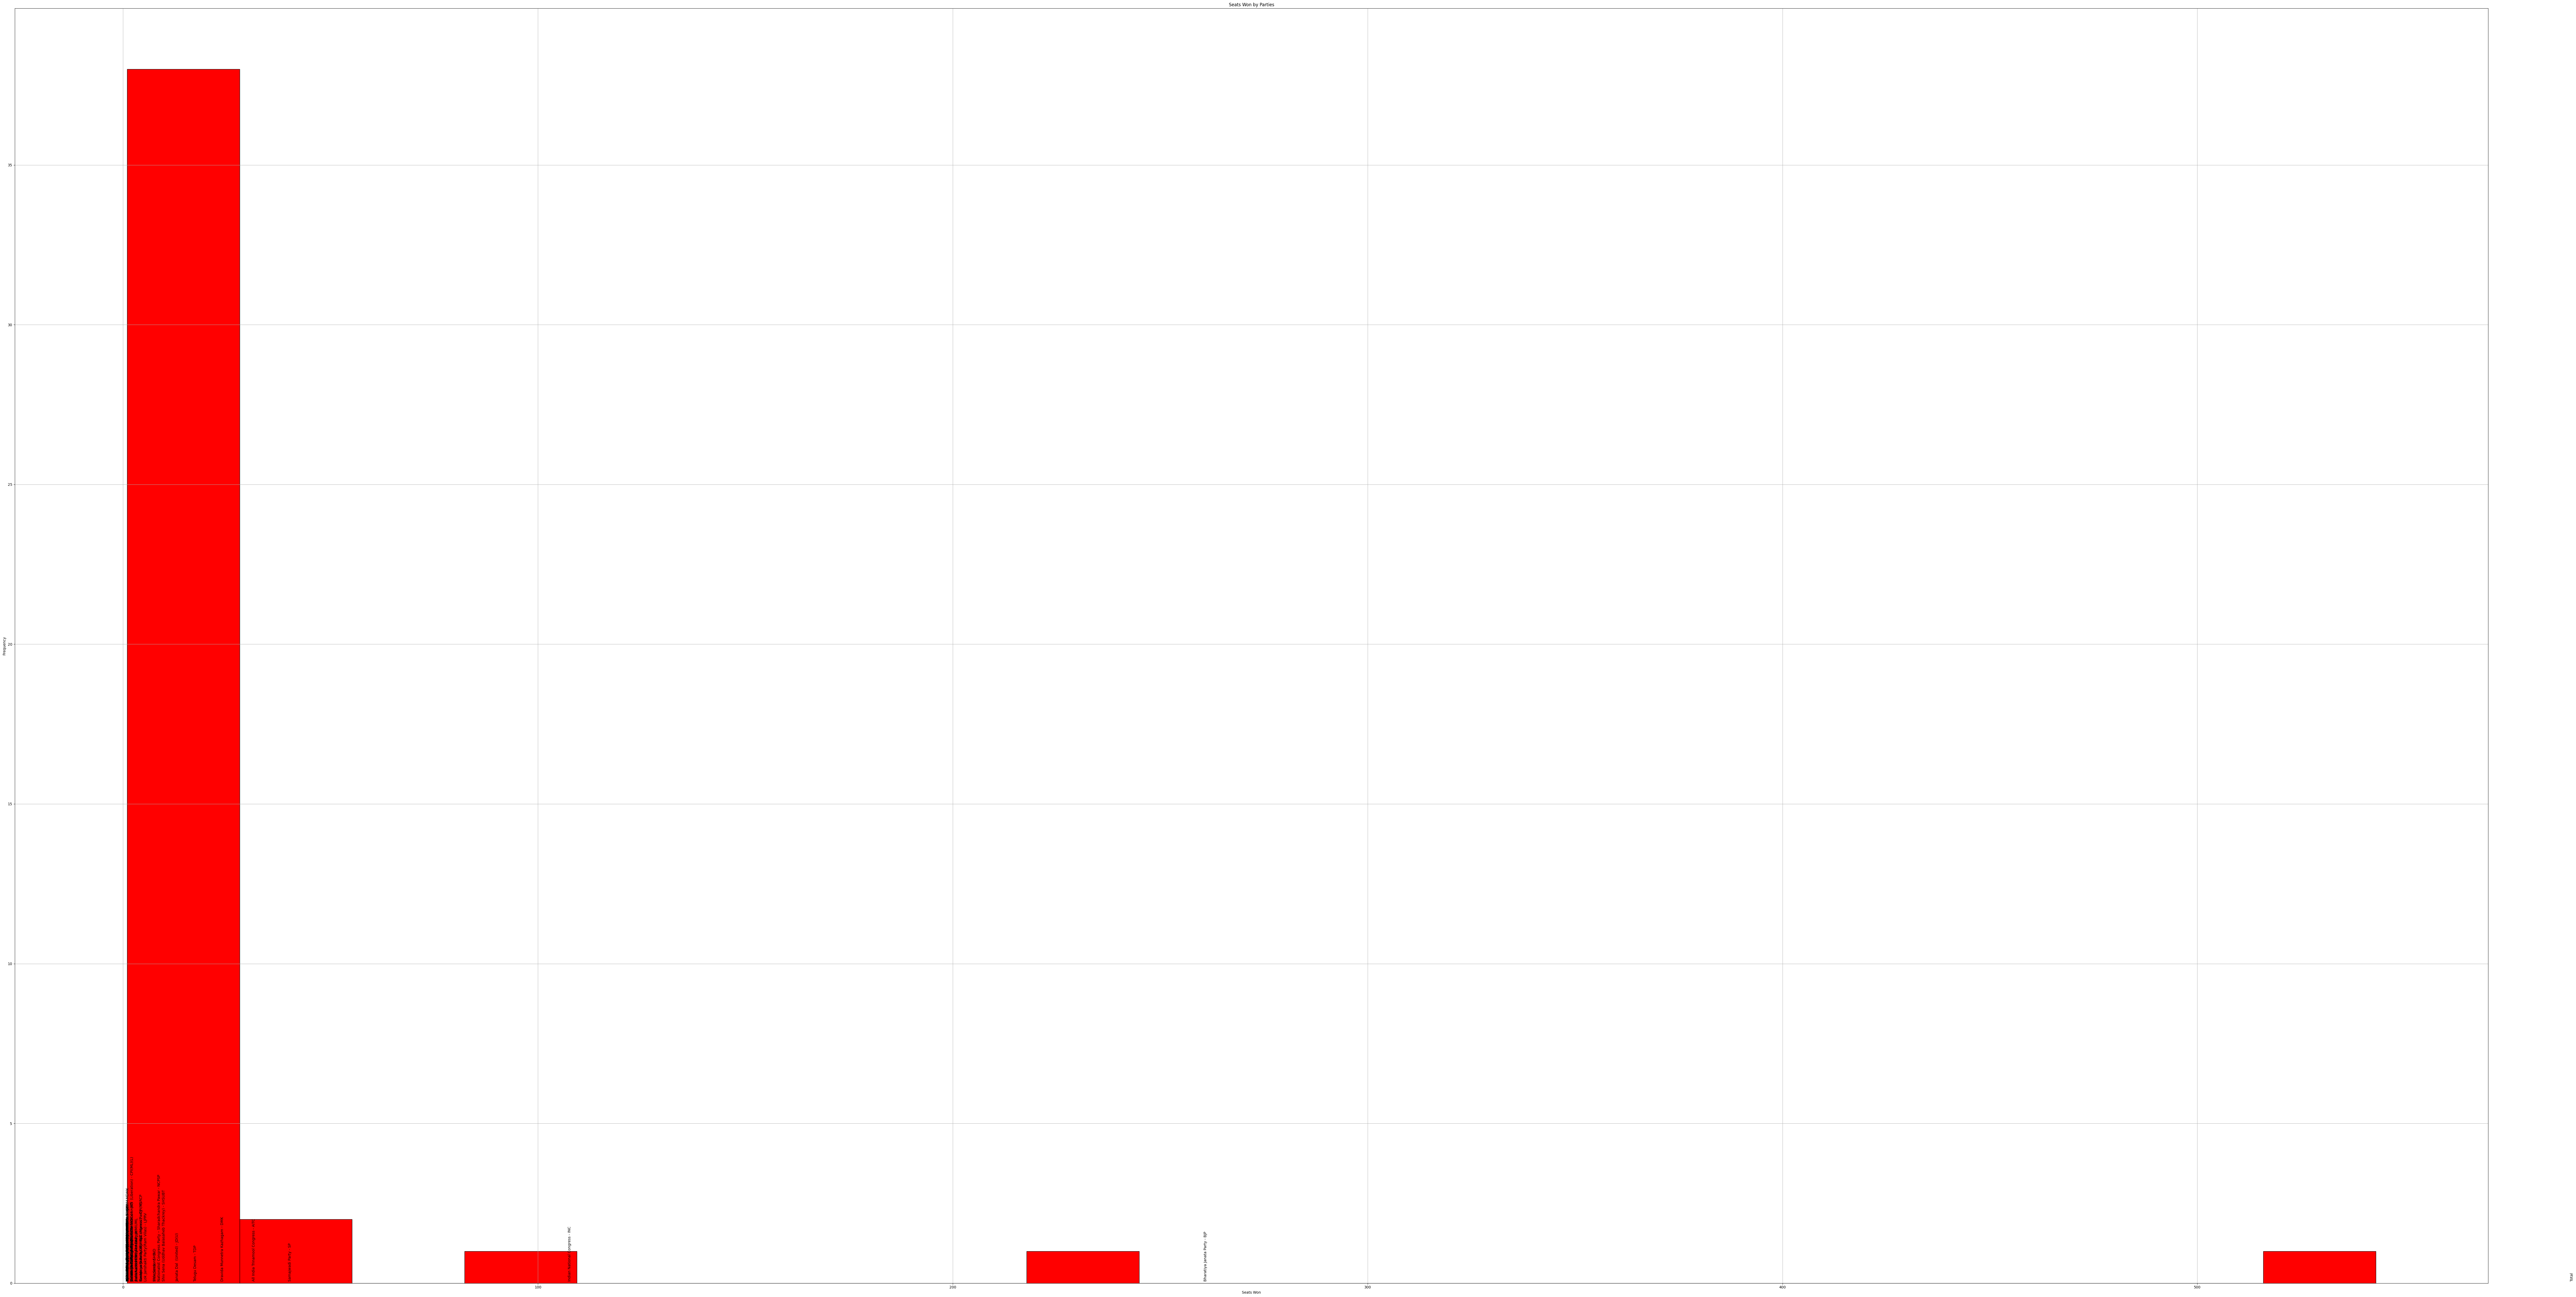

In [72]:
import csv
import matplotlib.pyplot as plt

# Path to your CSV file
csv_file = '/content/Election.csv'

# List to store party names and 'Won' values
parties = []
won_values = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        party_name = row['Party']
        won_value = int(row['Won'])
        parties.append(party_name)
        won_values.append(won_value)

plt.figure(figsize=(100, 50))
plt.hist(won_values, bins=20, color='Red', edgecolor='black')
plt.xlabel('Seats Won')
plt.ylabel('Frequency')
plt.title('Seats Won by Parties')
plt.grid(True)

for party, value in zip(parties, won_values):
    plt.annotate(party, xy=(value, 0), xytext=(value, 5),
                 textcoords='offset points', ha='center', va='bottom', rotation=90)

plt.tight_layout()
plt.show()


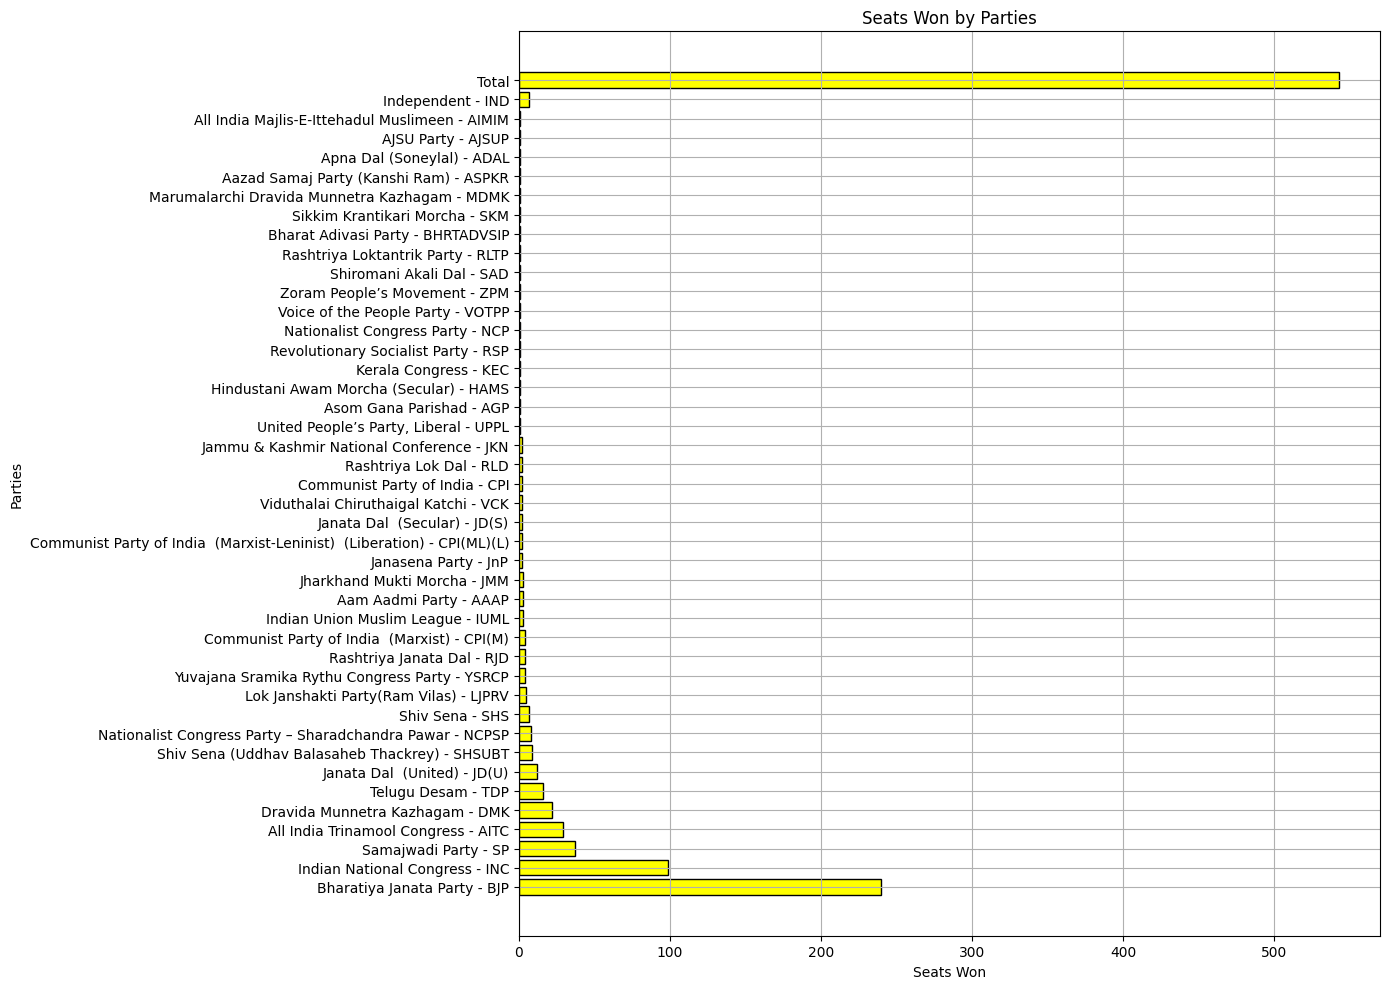

In [49]:
import csv
import matplotlib.pyplot as plt

csv_file = '/content/Election.csv'

parties = []
won_values = []

with open(csv_file, newline='', encoding='utf-8') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        party_name = row['Party']
        won_value = int(row['Won'])
        parties.append(party_name)
        won_values.append(won_value)

plt.figure(figsize=(14, 10))
plt.barh(parties, won_values, color='Yellow', edgecolor='black')
plt.xlabel('Seats Won')
plt.ylabel('Parties')
plt.title('Seats Won by Parties')
plt.grid(True)
plt.tight_layout()
plt.show()


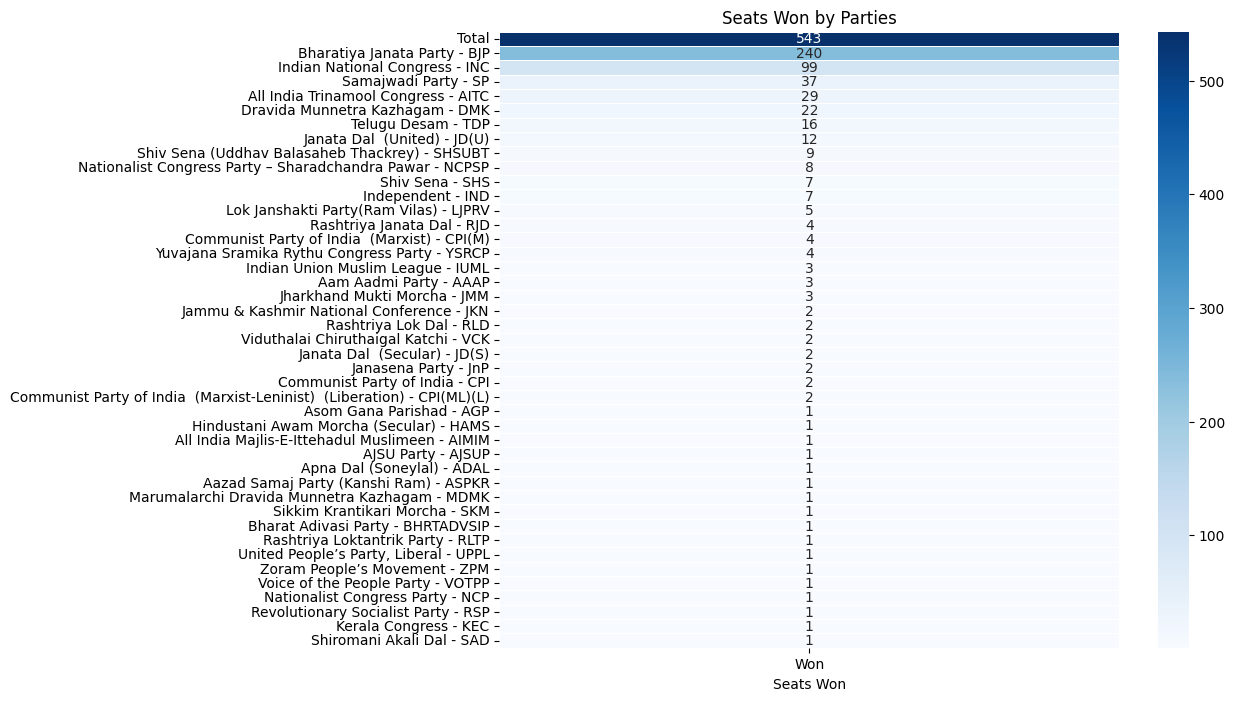

In [60]:
import seaborn as sns

csv_file = '/content/Election.csv'


df = pd.read_csv(csv_file)

df_sorted = df.sort_values(by='Won', ascending=False)

parties = df_sorted['Party']
won_values = df_sorted['Won']

plt.figure(figsize=(10, 8))
sns.heatmap(pd.DataFrame(won_values), cmap='Blues', annot=True, fmt='d', linewidths=.5, yticklabels=parties)
plt.xlabel('Seats Won')
plt.title('Seats Won by Parties')
plt.show()


***10 key insight that you can derive from the data***

1) Top 5 Parties Won the Seats in the election:Sorts the DataFrame by 'Won' in descending order and selects the top 5 parties.

2) Parties with Only 1 Seat: Filters parties that have won exactly 1 seat.

3) Total Number of Parties: Computes the total number of unique parties in the dataset.

4) Average Seats Won per Party: Calculates the mean (average) number of seats won per party.

5) Maximum Seats Won by a Single Party: Finds the maximum number of seats won by any single party.

6) Parties with Zero Seats: Identifies parties that have won zero seats.

7) Regional Parties (Less than 10 Seats): Filters parties with less than 10 seats, indicating their regional influence.

8) Regional Distribution of Party Wins:The insight highlights how parties' electoral success varies across different regions of the country.

9) Minority Parties (1-4 Seats): Selects parties that have won between 1 to 4 seats, highlighting smaller party representation.

10) Distribution of Seats Won by Major Political Alliances.

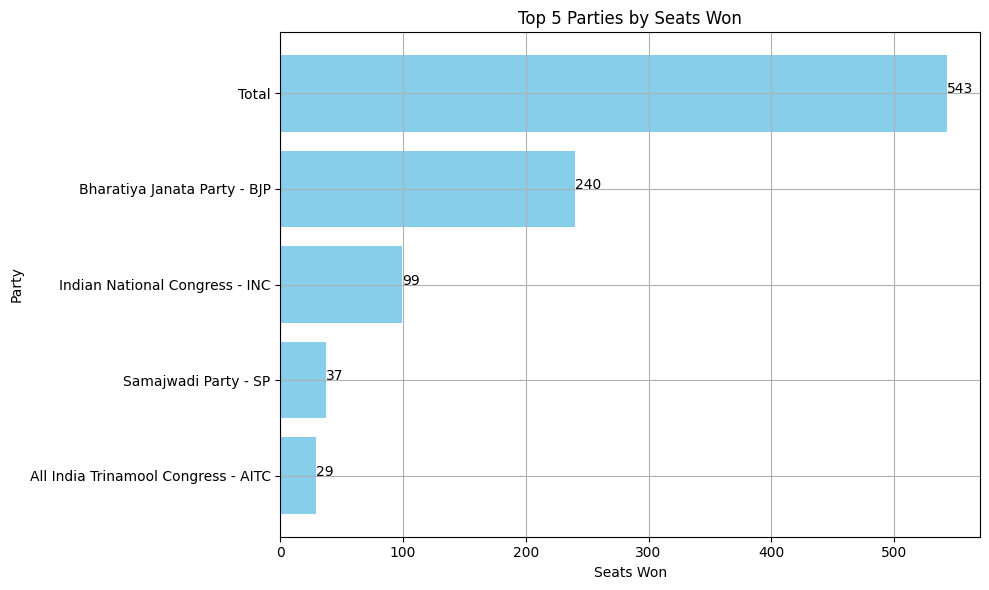

In [58]:
#1
import matplotlib.pyplot as plt

csv_file = '/content/Election.csv'

df = pd.read_csv(csv_file)

df_sorted = df.sort_values(by='Won', ascending=False)

top_n = 5
top_parties = df_sorted.head(top_n)['Party']
top_won_values = df_sorted.head(top_n)['Won']

plt.figure(figsize=(10, 6))
plt.barh(top_parties, top_won_values, color='skyblue')
plt.xlabel('Seats Won')
plt.ylabel('Party')
plt.title(f'Top {top_n} Parties by Seats Won')
plt.gca().invert_yaxis()
plt.grid(True)

for index, value in enumerate(top_won_values):
    plt.text(value, index, str(value))

plt.tight_layout()
plt.show()


In [71]:
#2
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
parties_with_one_seat = df[df['Won'] == 1]['Party']
print("Parties with Exactly 1 Seat:")
for party in parties_with_one_seat:
    print(party)

Parties with Exactly 1 Seat:
United People’s Party, Liberal - UPPL
Asom Gana Parishad - AGP
Hindustani Awam Morcha (Secular) - HAMS
Kerala Congress - KEC
Revolutionary Socialist Party - RSP
Nationalist Congress Party - NCP
Voice of the People Party - VOTPP
Zoram People’s Movement - ZPM
Shiromani Akali Dal - SAD
Rashtriya Loktantrik Party - RLTP
Bharat Adivasi Party - BHRTADVSIP
Sikkim Krantikari Morcha - SKM
Marumalarchi Dravida Munnetra Kazhagam - MDMK
Aazad Samaj Party (Kanshi Ram) - ASPKR
Apna Dal (Soneylal) - ADAL
AJSU Party - AJSUP
All India Majlis-E-Ittehadul Muslimeen - AIMIM


In [64]:
#3
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
total_parties = df['Party'].nunique()
print(f"Total Number of Parties: {total_parties}")


Total Number of Parties: 43


In [68]:
#4
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
average_seats_per_party = df['Won'].mean()
print(f"Average Seats Won per Party: {average_seats_per_party:.2f}")


Average Seats Won per Party: 25.26


In [73]:
#5
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
max_seats_won = df['Won'].max()
print(f'Maximum Seats Won by a Single Party: {max_seats_won}')

Maximum Seats Won by a Single Party: 543


In [76]:
#6
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
parties_with_zero_seats = df[df['Won'] == 0]['Party']
print("Parties with Zero Seats:")
print(parties_with_zero_seats)



Parties with Zero Seats:
Series([], Name: Party, dtype: object)


In [77]:
#7
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
regional_parties = df[df['Won'] < 10]['Party']
print("Regional Parties (Less than 10 Seats):")
print(regional_parties)


Regional Parties (Less than 10 Seats):
7        Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT
8     Nationalist Congress Party – Sharadchandra Paw...
9                                       Shiv Sena - SHS
10               Lok Janshakti Party(Ram Vilas) - LJPRV
11        Yuvajana Sramika Rythu Congress Party - YSRCP
12                           Rashtriya Janata Dal - RJD
13         Communist Party of India  (Marxist) - CPI(M)
14                    Indian Union Muslim League - IUML
15                               Aam Aadmi Party - AAAP
16                         Jharkhand Mukti Morcha - JMM
17                                 Janasena Party - JnP
18    Communist Party of India  (Marxist-Leninist)  ...
19                        Janata Dal  (Secular) - JD(S)
20                 Viduthalai Chiruthaigal Katchi - VCK
21                       Communist Party of India - CPI
22                              Rashtriya Lok Dal - RLD
23            Jammu & Kashmir National Conference - JKN
24       

In [88]:
#8
top_parties = ['Bharatiya Janata Party - BJP', 'Indian National Congress - INC',
               'Samajwadi Party - SP', 'All India Trinamool Congress - AITC',
               'Dravida Munnetra Kazhagam - DMK']
region_mapping = {
    'Bharatiya Janata Party - BJP': {'North': 120, 'South': 40, 'East': 50, 'West': 30, 'Central': 0},
    'Indian National Congress - INC': {'North': 30, 'South': 40, 'East': 20, 'West': 9, 'Central': 0},
    'Samajwadi Party - SP': {'North': 20, 'South': 5, 'East': 10, 'West': 2, 'Central': 0},
    'All India Trinamool Congress - AITC': {'North': 10, 'South': 15, 'East': 30, 'West': 5, 'Central': 0},
    'Dravida Munnetra Kazhagam - DMK': {'North': 5, 'South': 30, 'East': 2, 'West': 0, 'Central': 0}
}
regional_data = []
for party in top_parties:
    regional_data.append({
        'Party': party,
        'North': region_mapping.get(party, {}).get('North', 0),
        'South': region_mapping.get(party, {}).get('South', 0),
        'East': region_mapping.get(party, {}).get('East', 0),
        'West': region_mapping.get(party, {}).get('West', 0),
        'Central': region_mapping.get(party, {}).get('Central', 0)
    })
regional_distribution = pd.DataFrame(regional_data)
print("Regional Distribution of Party Wins:")
print(regional_distribution)


Regional Distribution of Party Wins:
                                 Party  North  South  East  West  Central
0         Bharatiya Janata Party - BJP    120     40    50    30        0
1       Indian National Congress - INC     30     40    20     9        0
2                 Samajwadi Party - SP     20      5    10     2        0
3  All India Trinamool Congress - AITC     10     15    30     5        0
4      Dravida Munnetra Kazhagam - DMK      5     30     2     0        0


In [78]:
#9
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
minority_parties = df[(df['Won'] >= 1) & (df['Won'] <= 4)]['Party']
print("Minority Parties (1-4 Seats):")
print(minority_parties)


Minority Parties (1-4 Seats):
11        Yuvajana Sramika Rythu Congress Party - YSRCP
12                           Rashtriya Janata Dal - RJD
13         Communist Party of India  (Marxist) - CPI(M)
14                    Indian Union Muslim League - IUML
15                               Aam Aadmi Party - AAAP
16                         Jharkhand Mukti Morcha - JMM
17                                 Janasena Party - JnP
18    Communist Party of India  (Marxist-Leninist)  ...
19                        Janata Dal  (Secular) - JD(S)
20                 Viduthalai Chiruthaigal Katchi - VCK
21                       Communist Party of India - CPI
22                              Rashtriya Lok Dal - RLD
23            Jammu & Kashmir National Conference - JKN
24                United People’s Party, Liberal - UPPL
25                             Asom Gana Parishad - AGP
26              Hindustani Awam Morcha (Secular) - HAMS
27                                Kerala Congress - KEC
28                

In [89]:
#10
csv_file = '/content/Election.csv'
df = pd.read_csv(csv_file)
alliance_groups = {
    'NDA': ['Bharatiya Janata Party - BJP', 'Shiv Sena (Uddhav Balasaheb Thackrey) - SHSUBT'],
    'UPA': ['Indian National Congress - INC'],
    'Others': ['Samajwadi Party - SP', 'All India Trinamool Congress - AITC', 'Dravida Munnetra Kazhagam - DMK',
               'Telugu Desam - TDP', 'Janata Dal  (United) - JD(U)', 'Nationalist Congress Party â€“ Sharadchandra Pawar - NCPSP',
               'Shiv Sena - SHS', 'Lok Janshakti Party(Ram Vilas) - LJPRV', 'Yuvajana Sramika Rythu Congress Party - YSRCP',
               'Rashtriya Janata Dal - RJD', 'Communist Party of India  (Marxist) - CPI(M)', 'Indian Union Muslim League - IUML',
               'Aam Aadmi Party - AAAP', 'Jharkhand Mukti Morcha - JMM', 'Janasena Party - JnP',
               'Communist Party of India  (Marxist-Leninist)  (Liberation) - CPI(ML)(L)', 'Janata Dal  (Secular) - JD(S)',
               'Viduthalai Chiruthaigal Katchi - VCK', 'Communist Party of India - CPI', 'Rashtriya Lok Dal - RLD',
               'Jammu & Kashmir National Conference - JKN', 'United Peopleâ€™s Party, Liberal - UPPL',
               'Asom Gana Parishad - AGP', 'Hindustani Awam Morcha (Secular) - HAMS', 'Kerala Congress - KEC',
               'Revolutionary Socialist Party - RSP', 'Nationalist Congress Party - NCP', 'Voice of the People Party - VOTPP',
               'Zoram Peopleâ€™s Movement - ZPM', 'Shiromani Akali Dal - SAD', 'Rashtriya Loktantrik Party - RLTP',
               'Bharat Adivasi Party - BHRTADVSIP', 'Sikkim Krantikari Morcha - SKM', 'Marumalarchi Dravida Munnetra Kazhagam - MDMK',
               'Aazad Samaj Party (Kanshi Ram) - ASPKR', 'Apna Dal (Soneylal) - ADAL', 'AJSU Party - AJSUP',
               'All India Majlis-E-Ittehadul Muslimeen - AIMIM', 'Independent - IND']
}
alliance_seat_distribution = {}
for alliance, parties in alliance_groups.items():
    alliance_seat_distribution[alliance] = df[df['Party'].isin(parties)]['Won'].sum()
print("Distribution of Seats Won by Major Political Alliances:")
for alliance, seats in alliance_seat_distribution.items():
    print(f"{alliance}: {seats}")




Distribution of Seats Won by Major Political Alliances:
NDA: 249
UPA: 99
Others: 185
